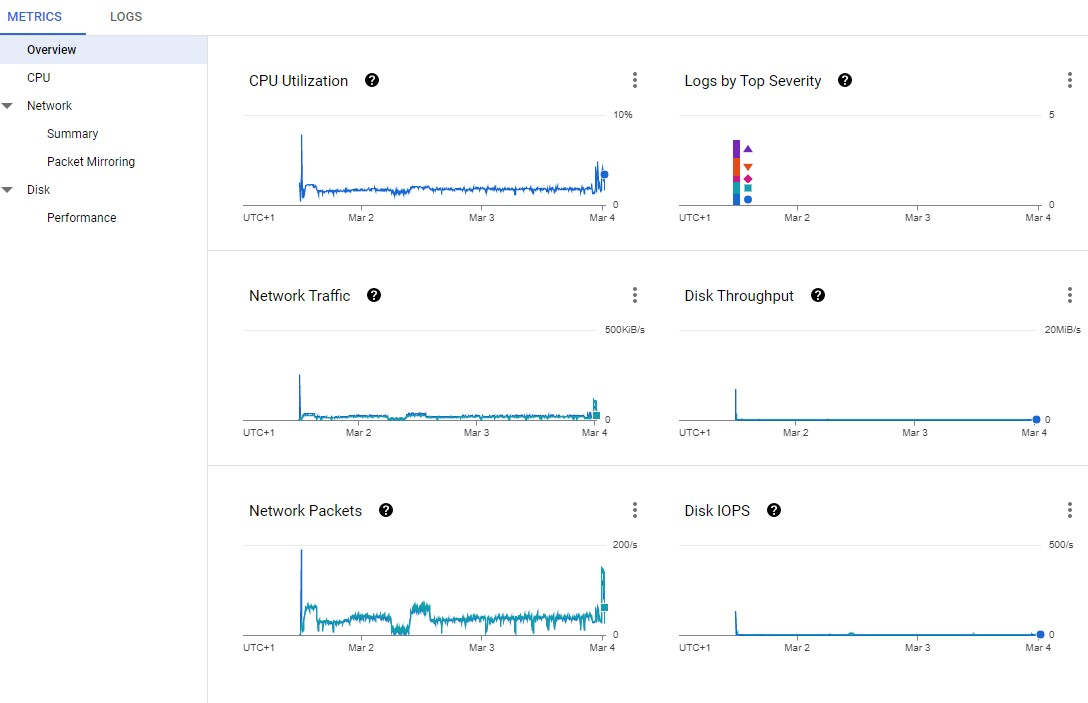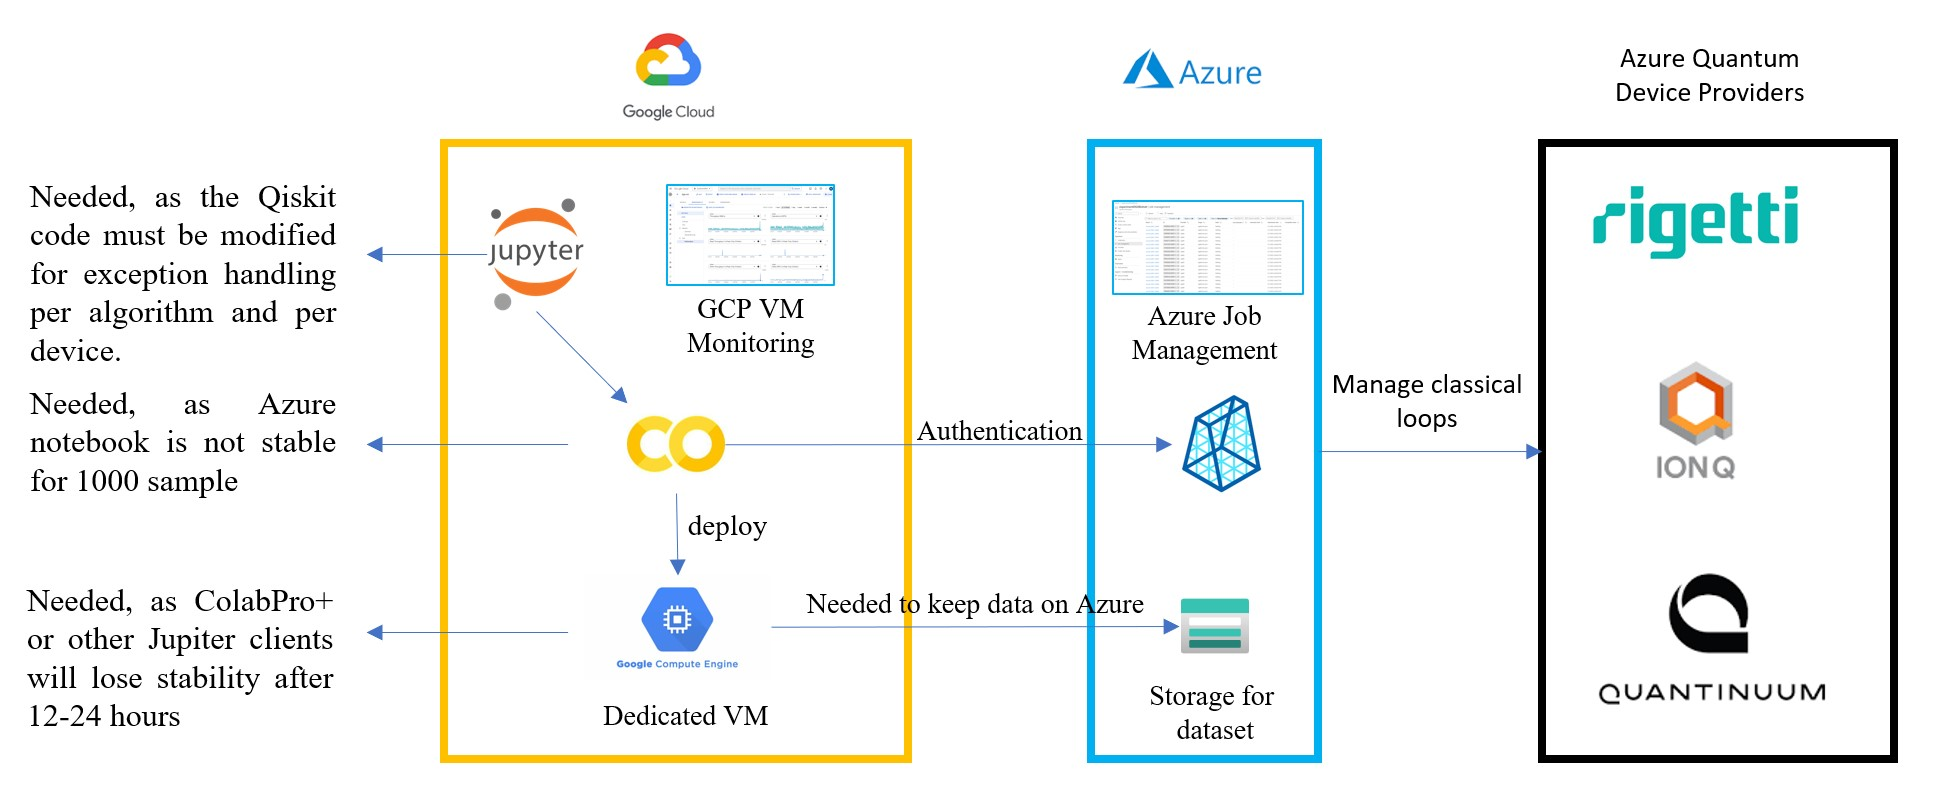

In [ ]:
!pip install pylatexenc
!pip install qiskit --upgrade;
!pip install qiskit-aer;
!pip install qiskit-terra;
!pip install -U azure-quantum
!pip install -U azure-quantum[qiskit]
!pip install -U qiskit_machine_learning

In [ ]:
#Function to load a file from a publicly accessible URL
import urllib.request

def download_file(url, save_path):
    urllib.request.urlretrieve(url, save_path)
    print(f'File successfully downloaded to {save_path}.')

In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from azure.quantum.qiskit import AzureQuantumProvider
from qiskit import QuantumCircuit, execute, Aer
from qiskit import *
from qiskit.utils import QuantumInstance
from azure.quantum import Workspace

provider = AzureQuantumProvider (
    resource_id = "/subscriptions/2501e059-13d8-4207-85d6-ec58656e2fae/resourceGroups/AzureQuantum/providers/Microsoft.Quantum/Workspaces/experimentDGABotnet",    
    location = "eastus"
)

print("This workspace's targets:")
for backend in provider.backends():
    print("- " + backend.name())

workspace = Workspace (
    subscription_id = "2501e059-13d8-4207-85d6-ec58656e2fae",
    resource_group = "AzureQuantum",
    name = "experimentDGABotnet",
    location = "eastus"

)



# Create IonQ simulator and QPU backends
ionq_simulator_backend = provider.get_backend("ionq.simulator")
ionq_qpu_backend = provider.get_backend("ionq.qpu")

# Create Rigetti simulator and QPU backends
rigetti_simulator_backend = provider.get_backend("rigetti.sim.qvm")
rigetti_qpu_backend = provider.get_backend("rigetti.qpu.aspen-m-3")

# Create Quantinuum simulator and QPU backends
Quantinuum_simulator_backend = provider.get_backend("quantinuum.sim.h1-2sc")
Quantinuum_qpu_backend = provider.get_backend("quantinuum.qpu.h1-2")

# Create QASM simulator 
backend = Aer.get_backend('qasm_simulator')

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.


This workspace's targets:


Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/images/branding/googlelogo/2x/googlelogo_color_150x54dp.png) no-repeat 0% 0%/100% 100%;-moz-border-image:u

To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code AS69372EW to authenticate.
- ionq.qpu
- ionq.qpu.aria-1
- ionq.simulator
- microsoft.estimator
- quantinuum.hqs-lt-s1
- quantinuum.hqs-lt-s1-apival
- quantinuum.hqs-lt-s2
- quantinuum.hqs-lt-s2-apival
- quantinuum.hqs-lt-s1-sim
- quantinuum.hqs-lt-s2-sim
- quantinuum.qpu.h1-1
- quantinuum.sim.h1-1sc
- quantinuum.qpu.h1-2
- quantinuum.sim.h1-2sc
- quantinuum.sim.h1-1e
- quantinuum.sim.h1-2e
- rigetti.sim.qvm
- rigetti.qpu.aspen-11
- rigetti.qpu.aspen-m-2
- rigetti.qpu.aspen-m-3


In [ ]:
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap, ZFeatureMap
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit.algorithms.optimizers import SLSQP, SPSA
from qiskit.circuit.library import TwoLocal
from qiskit import Aer, transpile

import numpy as np
import matplotlib.pyplot as plt
import datetime
import concurrent.futures
import time
import os
import csv
import pandas as pd
from IPython.display import clear_output

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Binarizer
from sklearn.decomposition import PCA


n_features = 7
training_size = 700
test_size = 300
feature_dim = 7
num_samples = 1000
datafilename="BotnetDgaDataset_1000.csv"
resultname="result_BotnetDgaDataset_1000.txt"
cwd=os.getcwd()
mycsv=cwd+"/"+datafilename

download_file('https://aq5efd7d2644dd406cb3ec2d.blob.core.windows.net/dga/BotnetDgaDataset_1000.csv', mycsv)

#download_file('https://aq5efd7d2644dd406cb3ec2d.blob.core.windows.net/dga/BotnetDgaDataset_10.csv', mycsv)

def load_data(filepath):

    with open(filepath) as csv_file:
        data_file = csv.reader(csv_file)
        temp = next(data_file)
        n_samples = 1000
        n_features = 7
        target_names = np.array(temp[2:])
        data = np.empty((n_samples, n_features))
        target = np.empty((n_samples,), dtype=np.int)

        for i, ir in enumerate(data_file):
            data[i] = np.asarray(ir[:-1], dtype=np.float64)
            target[i] = np.asarray(ir[-1], dtype=np.int)

    return data, target, target_names

File successfully downloaded to /content/BotnetDgaDataset_1000.csv.


In [ ]:
def _convert_data_dataframe(data, target,
                            feature_names, target_names):
    data_df = pd.DataFrame(data, columns=feature_names)
    target_df = pd.DataFrame(target, columns=target_names)
    combined_df = pd.concat([data_df, target_df], axis=1)
    X = combined_df[feature_names]
    y = combined_df[target_names]
    if y.shape[1] == 1:
        y = y.iloc[:, 0]
    return combined_df, X, y


def load_botnetdga(*, as_frame=False):

    data, target, target_names = load_data('BotnetDgaDataset_1000.csv')



    feature_names = ['MinREBotnets',
                     'CharLength',
                     'TreeNewFeature',
                     'nGramReputation_Alexa']

    frame = None
    target_columns = ['target', ]
    if as_frame:
        frame, data, target = _convert_data_dataframe(data,
                                                      target,
                                                      feature_names,
                                                      target_columns)

    return data, target


def botnetdga(training_size, test_size, n,
              standardize=False, pca=False, scale=False, plot_data=False,
              binarize=False):

    class_labels = [r'benign', r'dga']

    data, target = load_botnetdga()
    sample_train, sample_test, label_train, label_test = \
        train_test_split(data, target, train_size=training_size, test_size=test_size, random_state=7)

    # print("\n load_botnetdga sample_train = \n")
    # print(sample_train)
    # print("\n load_botnetdga sample_test = \n")
    # print(sample_test)

    # Now we standardize for gaussian around 0 with unit variance
    if standardize:
        std_scale = StandardScaler().fit(sample_train)
        sample_train = std_scale.transform(sample_train)
        sample_test = std_scale.transform(sample_test)

        # print("\n standardize sample_train = \n")
        # print(sample_train)
        # print("\n standardize sample_test = \n")
        # print(sample_test)

    # Now reduce number of features to number of qubits
    if pca:
        pca = PCA(n_components=n).fit(sample_train)
        sample_train = pca.transform(sample_train)
        sample_test = pca.transform(sample_test)

        # print("\n pca sample_train = \n")
        # print(sample_train)
        # print("\n pca sample_test = \n")
        # print(sample_test)

    # Scale to the range (-1,+1)
    if scale:
        samples = np.append(sample_train, sample_test, axis=0)
        minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
        sample_train = minmax_scale.transform(sample_train)
        sample_test = minmax_scale.transform(sample_test)

        # print("\n scale sample_train = \n")
        # print(sample_train)
        # print("\n scale sample_test = \n")
        # print(sample_test)

    if binarize:
        med = np.median(np.append(sample_train, sample_test, axis=0), axis=0)

        # print("\n binarize np.append(sample_train, sample_test, axis=0) = \n")
        # print(np.append(sample_train, sample_test, axis=0)[:5])
        # print("\n binarize med = \n")
        # print(med)

        transformer = Binarizer(threshold=med)
        # print("\n binarize transformer = \n")
        # print(transformer)

        sample_train = transformer.transform(sample_train)
        sample_test = transformer.transform(sample_test)

        # print("\n binarize sample_train = \n")
        # print(sample_train)
        # print("\n binarize sample_test = \n")
        # print(sample_test)

    # Pick training size number of samples from each distro
    training_input = {key: (sample_train[label_train == k, :])[:training_size]
                      for k, key in enumerate(class_labels)}
    test_input = {key: (sample_test[label_test == k, :])[:test_size]
                  for k, key in enumerate(class_labels)}

    return sample_train, training_input, test_input, class_labels

In [ ]:
#import time
start = time.perf_counter()

# BotnetDGA data set
plot_data = False
training_size = 700
test_size = 300
feature_dim = 7
standardize = False
pca = False
scale = False
binarize = False



# random_seed = 10598
# shots = 1024
# seed = 1376
# aqua_globals.random_seed = seed

sample_train, training_input, test_input, class_labels = botnetdga(training_size=training_size,
                                                                    test_size=test_size,
                                                                    n=feature_dim,
                                                                    standardize=standardize,
                                                                    pca=pca,
                                                                    scale=scale,
                                                                    plot_data=plot_data,
                                                                    binarize=binarize)

# print("\n sample_train = \n")
# print(sample_train)
# print("\n training_input = \n")
# print(training_input)
# print("\n test_input = \n")
# print(test_input)
# print("\n class_labels = \n")
# print(class_labels)

optimizer1 = SPSA()
#optimizer2 = ADAM()
#optimizer3 = AQGD()
#optimizer4 = CG()
#optimizer5 = COBYLA()
#optimizer6 = L_BFGS_B()
#optimizer7 = GSLS()
#optimizer8 = NELDER_MEAD()
#optimizer9 = NFT()
#optimizer10 = P_BFGS()
#optimizer11 = POWELL()
#optimizer12 = SLSQP()
#optimizer13 = TNC()

nFeature = 7

#feature_map1 = RawFeatureVector(nFeature)
#feature_map2 = PauliFeatureMap(nFeature)
feature_map3 = ZFeatureMap(nFeature)
#feature_map4 = ZZFeatureMap(nFeature)

#var_form11 = TwoLocal(feature_map1.num_qubits, ['ry', 'rz'], 'cz')
#var_form12 = RealAmplitudes(feature_map1.num_qubits)
#var_form13 = EfficientSU2(feature_map1.num_qubits)
#var_form14 = ExcitationPreserving(feature_map1.num_qubits)

#var_form21 = TwoLocal(feature_map2.num_qubits, ['ry', 'rz'], 'cz')
#var_form22 = RealAmplitudes(feature_map2.num_qubits)
#var_form23 = EfficientSU2(feature_map2.num_qubits)
#var_form24 = ExcitationPreserving(feature_map2.num_qubits)

#var_form31 = TwoLocal(feature_map3.num_qubits, ['ry', 'rz'], 'cz')
var_form32 = RealAmplitudes(feature_map3.num_qubits)
#var_form33 = EfficientSU2(feature_map3.num_qubits)
#var_form34 = ExcitationPreserving(feature_map3.num_qubits)

#var_form41 = TwoLocal(feature_map4.num_qubits, ['ry', 'rz'], 'cz')
#var_form42 = RealAmplitudes(feature_map4.num_qubits)
#var_form43 = EfficientSU2(feature_map4.num_qubits)
#var_form44 = ExcitationPreserving(feature_map4.num_qubits)

<ipython-input-4-25b2e8e33801>:47: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
<ipython-input-4-25b2e8e33801>:51: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 

In [ ]:
# This code is part of Qiskit. But to handle exception we changed it.
#
# (C) Copyright IBM 2022.
#
# This code is licensed under the Apache License, Version 2.0. You may
# obtain a copy of this license in the LICENSE.txt file in the root directory
# of this source tree or at http://www.apache.org/licenses/LICENSE-2.0.
#
# Any modifications or derivative works of this code must retain this
# copyright notice, and modified files need to carry a notice indicating
# that they have been altered from the originals.

"""Pegasos Quantum Support Vector Classifier."""
import time
import signal


from __future__ import annotations

import logging
from datetime import datetime
from typing import Dict

import numpy as np
from qiskit.utils import algorithm_globals
from sklearn.base import ClassifierMixin

from qiskit_machine_learning.algorithms  import SerializableModelMixin 
from qiskit_machine_learning import QiskitMachineLearningError
from qiskit_machine_learning.kernels import FidelityQuantumKernel, QuantumKernel, BaseKernel


logger = logging.getLogger(__name__)


class PegasosQSVC(ClassifierMixin, SerializableModelMixin):
    r"""
    Implements Pegasos Quantum Support Vector Classifier algorithm. The algorithm has been
    developed in [1] and includes methods ``fit``, ``predict`` and ``decision_function`` following
    the signatures
    of `sklearn.svm.SVC <https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html>`_.
    This implementation is adapted to work with quantum kernels.

    **Example**

    .. code-block:: python

        quantum_kernel = FidelityQuantumKernel()

        pegasos_qsvc = PegasosQSVC(quantum_kernel=quantum_kernel)
        pegasos_qsvc.fit(sample_train, label_train)
        pegasos_qsvc.predict(sample_test)

    **References**
        [1]: Shalev-Shwartz et al., Pegasos: Primal Estimated sub-GrAdient SOlver for SVM.
            `Pegasos for SVM <https://home.ttic.edu/~nati/Publications/PegasosMPB.pdf>`_

    """

    FITTED = 0
    UNFITTED = 1
    # pylint: disable=invalid-name
    def __init__(
        self,
        quantum_kernel: BaseKernel | None = None,
        C: float = 1.0,
        num_steps: int = 1000,
        precomputed: bool = False,
        seed: int | None = None,
    ) -> None:
        """
        Args:
            quantum_kernel: a quantum kernel to be used for classification. Has to be ``None`` when
                a precomputed kernel is used.
            C: Positive regularization parameter. The strength of the regularization is inversely
                proportional to C. Smaller ``C`` induce smaller weights which generally helps
                preventing overfitting. However, due to the nature of this algorithm, some of the
                computation steps become trivial for larger ``C``. Thus, larger ``C`` improve
                the performance of the algorithm drastically. If the data is linearly separable
                in feature space, ``C`` should be chosen to be large. If the separation is not
                perfect, ``C`` should be chosen smaller to prevent overfitting.

            num_steps: number of steps in the Pegasos algorithm. There is no early stopping
                criterion. The algorithm iterates over all steps.
            precomputed: a boolean flag indicating whether a precomputed kernel is used. Set it to
                ``True`` in case of precomputed kernel.
            seed: a seed for the random number generator

        Raises:
            ValueError:
                - if ``quantum_kernel`` is passed and ``precomputed`` is set to ``True``. To use
                a precomputed kernel, ``quantum_kernel`` has to be of the ``None`` type.
            TypeError:
                - if ``quantum_kernel`` neither instance of
                  :class:`~qiskit_machine_learning.kernels.BaseKernel` nor ``None``.
        """

        if precomputed:
            if quantum_kernel is not None:
                raise ValueError("'quantum_kernel' has to be None to use a precomputed kernel")
        else:
            if quantum_kernel is None:
                quantum_kernel = FidelityQuantumKernel()

        self._quantum_kernel = quantum_kernel
        self._precomputed = precomputed
        self._num_steps = num_steps
        if seed is not None:
            algorithm_globals.random_seed = seed

        if C > 0:
            self.C = C
        else:
            raise ValueError(f"C has to be a positive number, found {C}.")

        # these are the parameters being fit and are needed for prediction
        self._alphas: Dict[int, int] | None = None
        self._x_train: np.ndarray | None = None
        self._n_samples: int | None = None
        self._y_train: np.ndarray | None = None
        self._label_map: Dict[int, int] | None = None
        self._label_pos: int | None = None
        self._label_neg: int | None = None

        # added to all kernel values to include an implicit bias to the hyperplane
        self._kernel_offset = 1

        # for compatibility with the base SVC class. Set as unfitted.
        self.fit_status_ = PegasosQSVC.UNFITTED

    # pylint: disable=invalid-name
    def fit(
        self, X: np.ndarray, y: np.ndarray, sample_weight: np.ndarray | None = None
    ) -> "PegasosQSVC":
        """Fit the model according to the given training data.

        Args:
            X: Train features. For a callable kernel (an instance of
               :class:`~qiskit_machine_learning.kernels.BaseKernel`) the shape
               should be ``(n_samples, n_features)``, for a precomputed kernel the shape should be
               ``(n_samples, n_samples)``.
            y: shape (n_samples), train labels . Must not contain more than two unique labels.
            sample_weight: this parameter is not supported, passing a value raises an error.

        Returns:
            ``self``, Fitted estimator.

        Raises:
            ValueError:
                - X and/or y have the wrong shape.
                - X and y have incompatible dimensions.
                - y includes more than two unique labels.
                - Pre-computed kernel matrix has the wrong shape and/or dimension.

            NotImplementedError:
                - when a sample_weight which is not None is passed.
        """
        # check whether the data have the right format
        if np.ndim(X) != 2:
            raise ValueError("X has to be a 2D array")
        if np.ndim(y) != 1:
            raise ValueError("y has to be a 1D array")
        if len(np.unique(y)) != 2:
            raise ValueError("Only binary classification is supported")
        if X.shape[0] != y.shape[0]:
            raise ValueError("'X' and 'y' have to contain the same number of samples")
        if self._precomputed and X.shape[0] != X.shape[1]:
            raise ValueError(
                "For a precomputed kernel, X should be in shape (n_samples, n_samples)"
            )
        if sample_weight is not None:
            raise NotImplementedError(
                "Parameter 'sample_weight' is not supported. All samples have to be weighed equally"
            )
        # reset the fit state
        self.fit_status_ = PegasosQSVC.UNFITTED

        # the algorithm works with labels in {+1, -1}
        self._label_pos = np.unique(y)[0]
        self._label_neg = np.unique(y)[1]
        self._label_map = {self._label_pos: +1, self._label_neg: -1}

        # the training data are later needed for prediction
        self._x_train = X
        self._y_train = y
        self._n_samples = X.shape[0]

        # empty dictionary to represent sparse array
        self._alphas = {}

        t_0 = datetime.now()
        # training loop
        for step in range(1, self._num_steps + 1):
            # for every step, a random index (determining a random datum) is fixed
            i = algorithm_globals.random.integers(0, len(y))

            value = self._compute_weighted_kernel_sum(i, X, training=True)

            if (self._label_map[y[i]] * self.C / step) * value < 1:
                # only way for a component of alpha to become non zero
                self._alphas[i] = self._alphas.get(i, 0) + 1

        self.fit_status_ = PegasosQSVC.FITTED

        logger.debug("fit completed after %s", str(datetime.now() - t_0)[:-7])

        return self


    # pylint: disable=invalid-name
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Perform classification on samples in X.

        Args:
            X: Features. For a callable kernel (an instance of
               :class:`~qiskit_machine_learning.kernels.BaseKernel`) the shape
               should be ``(m_samples, n_features)``, for a precomputed kernel the shape should be
               ``(m_samples, n_samples)``. Where ``m`` denotes the set to be predicted and ``n`` the
               size of the training set. In that case, the kernel values in X have to be calculated
               with respect to the elements of the set to be predicted and the training set.

        Returns:
            An array of the shape (n_samples), the predicted class labels for samples in X.

        Raises:
            QiskitMachineLearningError:
                - predict is called before the model has been fit.
            ValueError:
                - Pre-computed kernel matrix has the wrong shape and/or dimension.
        """

        t_0 = datetime.now()
        values = self.decision_function(X)
        y = np.array([self._label_pos if val > 0 else self._label_neg for val in values])
        logger.debug("prediction completed after %s", str(datetime.now() - t_0)[:-7])

        return y


    def decision_function(self, X: np.ndarray) -> np.ndarray:
        """
        Evaluate the decision function for the samples in X.

        Args:
            X: Features. For a callable kernel (an instance of
               :class:`~qiskit_machine_learning.kernels.BaseKernel`) the shape
               should be ``(m_samples, n_features)``, for a precomputed kernel the shape should be
               ``(m_samples, n_samples)``. Where ``m`` denotes the set to be predicted and ``n`` the
               size of the training set. In that case, the kernel values in X have to be calculated
               with respect to the elements of the set to be predicted and the training set.

        Returns:
            An array of the shape (n_samples), the decision function of the sample.

        Raises:
            QiskitMachineLearningError:
                - the method is called before the model has been fit.
            ValueError:
                - Pre-computed kernel matrix has the wrong shape and/or dimension.
        """
        if self.fit_status_ == PegasosQSVC.UNFITTED:
            raise QiskitMachineLearningError("The PegasosQSVC has to be fit first")
        if np.ndim(X) != 2:
            raise ValueError("X has to be a 2D array")
        if self._precomputed and self._n_samples != X.shape[1]:
            raise ValueError(
                "For a precomputed kernel, X should be in shape (m_samples, n_samples)"
            )

        values = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            values[i] = self._compute_weighted_kernel_sum(i, X, training=False)

        return values

#changed code
    def _compute_weighted_kernel_sum(self, index: int, X: np.ndarray, training: bool) -> float:
        """Helper function to compute the weighted sum over support vectors used for both training
        and prediction with the Pegasos algorithm.

        Args:
            index: fixed index distinguishing some datum
            X: Features
            training: flag indicating whether the loop is used within training or prediction

        Returns:
            Weighted sum of kernel evaluations employed in the Pegasos algorithm
        """
        # non-zero indices corresponding to the support vectors
        support_indices = list(self._alphas.keys())

        # for training
        if training:
            # support vectors
            x_supp = X[support_indices]
        # for prediction
        else:
            x_supp = self._x_train[support_indices]

        try:
            start_time = time.time()
            if not self._precomputed:
                # evaluate kernel function only for the fixed datum and the support vectors
                kernel = self._quantum_kernel.evaluate(X[index], x_supp) + self._kernel_offset
            else:
                kernel = X[index, support_indices]
            elapsed_time = time.time() - start_time
            if elapsed_time > 4:
                # kernel computation took too long, terminate this round
                return 0  # or any other default value
        except Exception as e:
            # log the exception message
            print(f"Exception occurred while computing kernel: {e}")
            # signal that this round failed
            return 0  # or any other default value


        # map the training labels of the support vectors to {-1,1}
        y = np.array(list(map(self._label_map.get, self._y_train[support_indices])))
        # weights for the support vectors
        alphas = np.array(list(self._alphas.values()))
        # this value corresponds to a sum of kernel values weighted by their labels and alphas
        value = np.sum(alphas * y * kernel)

        return value


#enc of change    




    @property
    def quantum_kernel(self) -> BaseKernel:
        """Returns quantum kernel"""
        return self._quantum_kernel

    @quantum_kernel.setter
    def quantum_kernel(self, quantum_kernel: BaseKernel):
        """
        Sets quantum kernel. If previously a precomputed kernel was set, it is reset to ``False``.
        """

        self._quantum_kernel = quantum_kernel
        # quantum kernel is set, so we assume the kernel is not precomputed
        self._precomputed = False

        # reset training status
        self._reset_state()

    @property
    def num_steps(self) -> int:
        """Returns number of steps in the Pegasos algorithm."""
        return self._num_steps

    @num_steps.setter
    def num_steps(self, num_steps: int):
        """Sets the number of steps to be used in the Pegasos algorithm."""
        self._num_steps = num_steps

        # reset training status
        self._reset_state()

    @property
    def precomputed(self) -> bool:
        """Returns a boolean flag indicating whether a precomputed kernel is used."""
        return self._precomputed

    @precomputed.setter
    def precomputed(self, precomputed: bool):
        """Sets the pre-computed kernel flag. If ``True`` is passed then the previous kernel is
        cleared. If ``False`` is passed then a new instance of
        :class:`~qiskit_machine_learning.kernels.FidelityQuantumKernel` is created."""
        self._precomputed = precomputed
        if precomputed:
            # remove the kernel, a precomputed will
            self._quantum_kernel = None
        else:
            # re-create a new default quantum kernel
            self._quantum_kernel = FidelityQuantumKernel()

        # reset training status
        self._reset_state()

    def _reset_state(self):
        """Resets internal data structures used in training."""
        self.fit_status_ = PegasosQSVC.UNFITTED
        self._alphas = None
        self._x_train = None
        self._n_samples = None
        self._y_train = None
        self._label_map = None
        self._label_pos = None
        self._label_neg = None


In [ ]:
#PegasosQSVC
import csv
import os
import numpy as np
from sklearn.datasets import make_blobs
datafilename="BotnetDgaDataset_1000.csv"
resultname="result_BotnetDgaDataset_pegasos_1000.txt"
cwd=os.getcwd()
mycsv=cwd+"/"+datafilename
print(mycsv)
def load_data(filepath):
    with open(filepath) as csv_file:
        data_file = csv.reader(csv_file)
        temp = next(data_file)
        n_samples = 1000
        n_features = 7
        data = np.empty((n_samples, n_features))
        target = np.empty((n_samples,), dtype=int)

        for i, ir in enumerate(data_file):
            data[i] = np.asarray(ir[:-1], dtype=np.float64)
            target[i] = np.asarray(ir[-1], dtype=int)

    return data, target
dgafeatures, labels = load_data(mycsv)
print (len(dgafeatures))
print (len(labels))

/content/BotnetDgaDataset_1000.csv
1000
1000


In [ ]:
#Data preparation for pegasos
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler(feature_range=(0, np.pi)).fit_transform(dgafeatures)

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=700, shuffle=False
)

In [ ]:
#parameter setting for Pegasos
# number of qubits is equal to the number of features
num_qubits = 7

# number of steps performed during the training procedure
tau = 100

# regularization parameter
C = 1000

In [ ]:
#preparing/;
#1-The default fidelity instantiated in FidelityQuantumKernel
#2-A quantum kernel created from ZFeatureMap
from qiskit import BasicAer
from qiskit.circuit.library import ZFeatureMap
from qiskit.utils import algorithm_globals

from qiskit_machine_learning.kernels import FidelityQuantumKernel, QuantumKernel

algorithm_globals.random_seed = 12345

feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=1)

qkernel = FidelityQuantumKernel(feature_map=feature_map)


In [ ]:
#backend=rigetti_qpu_backend
backend=rigetti_simulator_backend
#backend = Aer.get_backend('qasm_simulator')
from qiskit.circuit.library import RealAmplitudes, ZFeatureMap, ZZFeatureMap, EfficientSU2

num_features =7
feature_map=ZFeatureMap(num_features,reps=1)
qkernel_backend = QuantumKernel(feature_map=feature_map, quantum_instance=backend)
#to see that qkernel_backend.feature_map and qkernel.feature_map are the same
#qkernel_backend.feature_map.decompose().draw("mpl", style="iqx")
#qkernel.feature_map.decompose().draw("mpl", style="iqx")

In [ ]:
#running model
#we use our modified version not the qiskit original version, for original version uncomment the below
#from qiskit_machine_learning.algorithms import PegasosQSVC
import time
pegasos_start=time.perf_counter()
#pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=C, num_steps=tau)
pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel_backend, C=C, num_steps=tau)
# training
pegasos_qsvc.fit(train_features, train_labels)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [ ]:
# testing
pegasos_score = pegasos_qsvc.score(test_features, test_labels)
pegasos_end=time.perf_counter()

print(f"PegasosQSVC Accuracy: {pegasos_score}")
print(f"PegasosQSVC Time: {pegasos_end-pegasos_start}")

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

..............................................................................................................................................................................................Exception occurred while computing kernel: sequence item 0: expected str instance, NoneType found
........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/msrest/serialization.py", line 1436, in _deserialize
    found_value = key_extractor(attr, attr_desc, data)
  File "/usr/local/lib/python3.8/dist-packages/msrest/serialization.py", line 1180, in rest_key_extractor
    return working_data.get(key)
AttributeError: 'str' object has no attribute 'get'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/msrest/serialization.py", line 1509, in failsafe_deserialize
    return self(target_obj, data, content_type=content_type)
  File "/usr/local/lib/python3.8/dist-packages/msrest/serialization.py", line 1376, in __call__
    return self._deserialize(target_obj, data)
  File "/usr/local/lib/python3.8/dist-packages/msrest/serialization.py", line 1454, in _deserialize
    raise_with_traceback(DeserializationError, msg, err)
  File "/usr/local/lib/python3.8/dist-package

Exception occurred while computing kernel: Operation returned an invalid status 'Server has been shutdown'
Content: The service is unavailable.
........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................Exception occurred while computing kernel: sequence item 0: expected str instance, NoneType found
....................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Visit https://aka.ms/azsdk/python/identity/environmentcredential/troubleshoot to troubleshoot.this issue.
Content: <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 404 (Not Found)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [ ]:
def convert_seconds(seconds):
    # calculate hours, minutes, and remaining seconds
    hours = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    
    # return formatted string
    return f"{hours} hour(s), {minutes} minute(s), {seconds} second(s)"



In [ ]:

print(f"PegasosQSVC Accuracy: {pegasos_score}")

computation_time=(pegasos_end-pegasos_start)
print("cloud computation time in seconds=",computation_time)
print(f"PegasosQSVC Time: {convert_seconds(computation_time)}")

PegasosQSVC Accuracy: 0.48333333333333334
cloud computation time in seconds= 206400.24008495902
PegasosQSVC Time: 57.0 hour(s), 20.0 minute(s), 0.24008495901944116 second(s)


In [ ]:
c=0
for job in workspace.list_jobs():
    if (job.details.status=='Succeeded'):
      c+=1
      #comptation_time_real=job.


In [ ]:
print("number of circuit calls=",c)

number of circuit calls= 32918


In [ ]:
def calculate_cost(milliseconds):
    increments = (milliseconds + 9) // 10
    cost = increments * 0.02
    return f"${cost:.2f} USD"

In [ ]:
c=0
computation_time_device=0
for job in workspace.list_jobs():
    if (job.details.status=='Succeeded'):
      c+=1
      
      detail=workspace.get_job(job.id)
      time_real=detail.details.cost_estimate.events[0]
      integer_value = int(''.join(filter(str.isdigit, time_real.measure_unit)))
      computation_time_device+=integer_value

In [ ]:
# estimation for Rigetti
print("number of circuit calls=",c)
print("quantum device time(milisecond)=",computation_time_device)
print("cost=",calculate_cost(computation_time_device)) 


number of circuit calls= 32918
quantum device time(milisecond)= 329180
cost= $658.36 USD
